In [ ]:
#pip install <library name>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import RandomForestRegressor

In [2]:
data = pd.read_csv(r"C:\Users\SHASHANK K\Downloads\Gold_Dataset.csv")

In [3]:
data.head()

,Date,Close,Volume,Open,High,Low
0,8/30/2000,273.899994,0.0,273.899994,273.899994,273.899994
1,8/31/2000,278.299988,0.0,274.799988,278.299988,274.799988
2,9/1/2000,277.000000,0.0,277.000000,277.000000,277.000000
3,9/4/2000,NaN,NaN,NaN,NaN,NaN
4,9/5/2000,275.799988,2.0,275.799988,275.799988,275.799988


In [4]:
data.tail()

,Date,Close,Volume,Open,High,Low
7859,10/24/2022,1654.1,167448.0,1662.9,1675.5,1648.0
7860,10/25/2022,1658.0,178706.0,1654.5,1666.8,1641.2
7861,10/26/2022,1669.2,183453.0,1657.7,1679.4,1653.8
7862,10/27/2022,1668.8,180599.0,1668.8,1674.8,1658.5
7863,10/28/2022,1648.3,186519.0,1667.2,1670.9,1640.7


In [5]:
data.shape

(7864, 6)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7864 entries, 0 to 7863
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    7864 non-null   object 
 1   Close   7752 non-null   float64
 2   Volume  7713 non-null   float64
 3   Open    7752 non-null   float64
 4   High    7752 non-null   float64
 5   Low     7752 non-null   float64
dtypes: float64(5), object(1)
memory usage: 368.8+ KB


In [7]:
data.dtypes

Date       object
Close     float64
Volume    float64
Open      float64
High      float64
Low       float64
dtype: object

<Axes: >

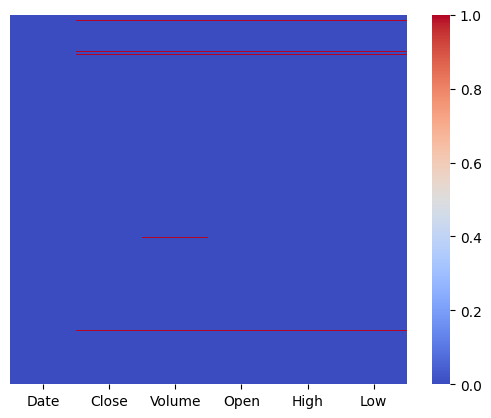

In [8]:
sns.heatmap(data.isnull(), yticklabels=False, cmap='coolwarm')

In [9]:
data.isnull().sum()

Date        0
Close     112
Volume    151
Open      112
High      112
Low       112
dtype: int64

In [10]:
data.dropna(inplace=True)

In [11]:
data.isnull().sum()

Date      0
Close     0
Volume    0
Open      0
High      0
Low       0
dtype: int64

In [12]:
data.shape

(7713, 6)

In [13]:
data

,Date,Close,Volume,Open,High,Low
0,8/30/2000,273.899994,0.0,273.899994,273.899994,273.899994
1,8/31/2000,278.299988,0.0,274.799988,278.299988,274.799988
2,9/1/2000,277.000000,0.0,277.000000,277.000000,277.000000
4,9/5/2000,275.799988,2.0,275.799988,275.799988,275.799988
5,9/6/2000,274.200012,0.0,274.200012,274.200012,274.200012
...,...,...,...,...,...,...
7859,10/24/2022,1654.100000,167448.0,1662.900000,1675.500000,1648.000000
7860,10/25/2022,1658.000000,178706.0,1654.500000,1666.800000,1641.200000
7861,10/26/2022,1669.200000,183453.0,1657.700000,1679.400000,1653.800000
7862,10/27/2022,1668.800000,180599.0,1668.800000,1674.800000,1658.500000


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7713 entries, 0 to 7863
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    7713 non-null   object 
 1   Close   7713 non-null   float64
 2   Volume  7713 non-null   float64
 3   Open    7713 non-null   float64
 4   High    7713 non-null   float64
 5   Low     7713 non-null   float64
dtypes: float64(5), object(1)
memory usage: 421.8+ KB


In [15]:
data.describe()

,Close,Volume,Open,High,Low
count,7713.000000,7713.000000,7713.000000,7713.000000,7713.000000
mean,1155.235226,62075.024115,1155.391793,1161.947206,1148.388280
std,471.495071,102180.191771,471.663195,474.882330,467.988318
min,255.100006,0.000000,255.000000,256.100006,255.000000
25%,866.400024,43.000000,862.900024,872.799988,857.400024
50%,1250.800049,319.000000,1250.700000,1256.900024,1243.599976
75%,1453.600000,122724.000000,1456.900024,1462.500000,1446.700000
max,2069.400000,787217.000000,2076.400000,2082.100000,2049.000000


# Graph Plotting

<Axes: >

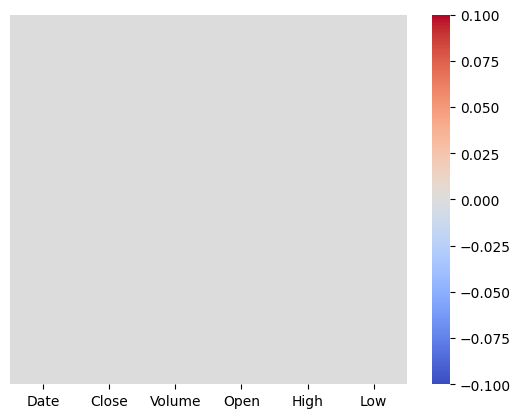

In [16]:
#Number of Null Data in datasets
sns.heatmap(data.isnull(), yticklabels=False, cmap='coolwarm')

C:\Users\SHASHANK K\AppData\Local\Temp\ipykernel_16672\341033998.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['High'],color='purple')


<Axes: xlabel='High', ylabel='Density'>

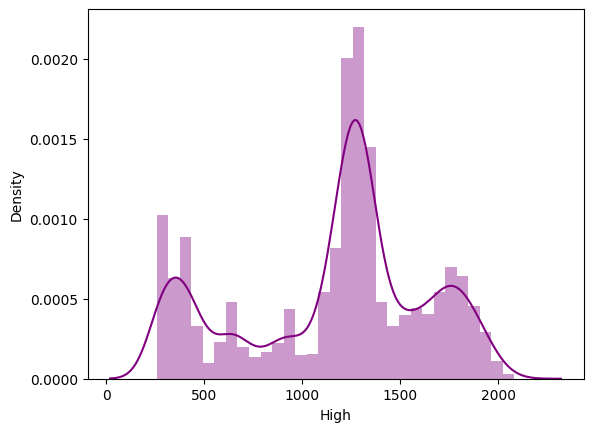

In [17]:
sns.distplot(data['High'],color='purple')

# Machine Learning Modelling

In [18]:
data

,Date,Close,Volume,Open,High,Low
0,8/30/2000,273.899994,0.0,273.899994,273.899994,273.899994
1,8/31/2000,278.299988,0.0,274.799988,278.299988,274.799988
2,9/1/2000,277.000000,0.0,277.000000,277.000000,277.000000
4,9/5/2000,275.799988,2.0,275.799988,275.799988,275.799988
5,9/6/2000,274.200012,0.0,274.200012,274.200012,274.200012
...,...,...,...,...,...,...
7859,10/24/2022,1654.100000,167448.0,1662.900000,1675.500000,1648.000000
7860,10/25/2022,1658.000000,178706.0,1654.500000,1666.800000,1641.200000
7861,10/26/2022,1669.200000,183453.0,1657.700000,1679.400000,1653.800000
7862,10/27/2022,1668.800000,180599.0,1668.800000,1674.800000,1658.500000


In [19]:
X = data.loc[:7713, ['Close', 'Volume', 'Open']]
Y = data.loc[:7713, ['High']]

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state=2)

In [21]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape) 

(6809, 3)
(757, 3)
(6809, 1)
(757, 1)


In [22]:
regressor = RandomForestRegressor(n_estimators=100)

In [23]:
regressor.fit(X_train,Y_train)

c:\users\shashank k\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor()

In [24]:
test_data_prediction = regressor.predict(X_test)

In [25]:
test_data_prediction

array([1234.59401222, 1583.40274735, 1959.25199346, 1264.32701075,
       1278.57300001, 1296.9650112 , 1218.55201479, 1416.2469793 ,
       1003.85198692, 1184.59800005, 1817.99001166,  409.94399514,
       1342.24399316,  734.40099376, 1247.27800195,  995.19400744,
       1405.43297098, 1248.67600145, 1299.49799854,  348.09300588,
       1261.68700047,  658.94299628,  836.27200192, 1851.05300072,
       1521.37599771,  865.960006  , 1291.06100864, 1322.31799632,
       1259.47100146, 1723.97100568, 1670.06000004,  927.67200612,
       1417.20799679, 1143.5180147 , 1682.21901009,  925.65799808,
        267.99399964,  320.50699802, 1214.05899401, 1313.26700739,
       1070.58398671,  933.26299748, 1317.98699496, 1206.26701451,
       1236.29999321, 1328.18699929, 1112.66401092,  961.02100396,
       1259.36499778, 1704.29599949, 1779.95200593, 1665.32799497,
       1366.20100048,  261.57099286, 1235.50898433, 1162.87400764,
        318.44400624, 1208.52199639, 1904.73000193,  365.65499

In [26]:
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9998970510134565


In [27]:
print(f"This Model scores: {round((error_score)*100, 2)}% accuracy")

This Model scores: 99.99% accuracy


In [28]:
sample = [[1660, 2000, 1670]]
regressor.predict(sample)

c:\users\shashank k\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([1672.84600591])